In [ ]:
!pip install spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


/var/folders/_z/wg0q98r5153183hvq_8k4vj80000gn/T/ipykernel_9122/2728002184.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
pip install fastparquet


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: /Users/oem123/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyarrow


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: /Users/oem123/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
df = pd.read_parquet('/Users/oem123/Desktop/nyt_data.parquet')

NameError: ignored

In [ ]:
df_2010 = df[df['year'] == 2010]

In [ ]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')


In [ ]:
df_2010.head()

,year,title,excerpt
16097393,2010,An excerpt from the Metropolitan Opera's produ...,
16097394,2010,"Over the past couple of years, Hadoop has turn...",
16097395,2010,An article on Friday about the work of the pho...,
16097396,2010,Are those perfect chairs just making us stay s...,
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,


In [ ]:
explain_text_entities(df_2010['excerpt'][16097393])

In [ ]:
one_sentence = (df_2010['excerpt'][16097393])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

/Users/oem123/anaconda3/lib/python3.10/site-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
explain_text_entities(df_2010['excerpt'][16097394])

In [ ]:
one_sentence = (df_2010['excerpt'][16097394])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [ ]:
text = df_2010['title'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

In [ ]:
doc = nlp(text)

In [ ]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

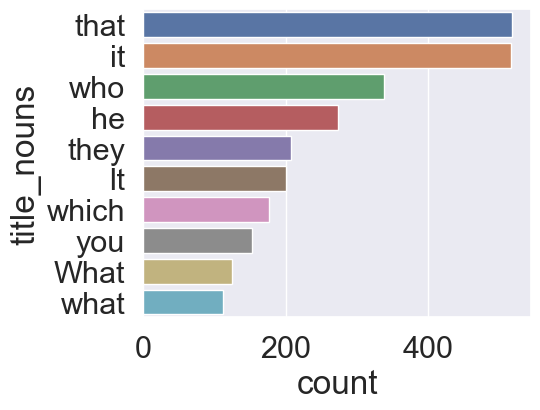

In [ ]:
df_nouns = pd.DataFrame(items_of_interest, columns=["title_nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="title_nouns",
             data=df_nouns,
             order=df_nouns["title_nouns"].value_counts().iloc[:10].index)
plt.show()

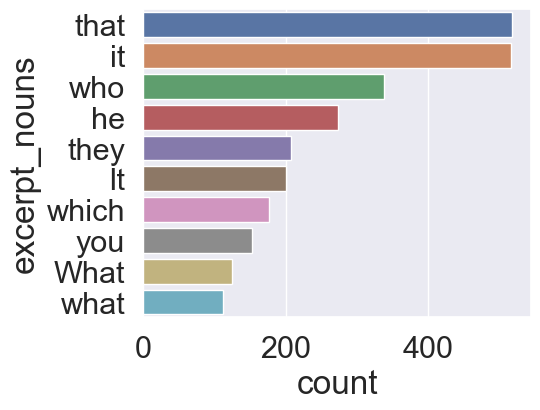

In [ ]:
df_nouns = pd.DataFrame(items_of_interest, columns=["excerpt_nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="excerpt_nouns",
             data=df_nouns,
             order=df_nouns["excerpt_nouns"].value_counts().iloc[:10].index)
plt.show()

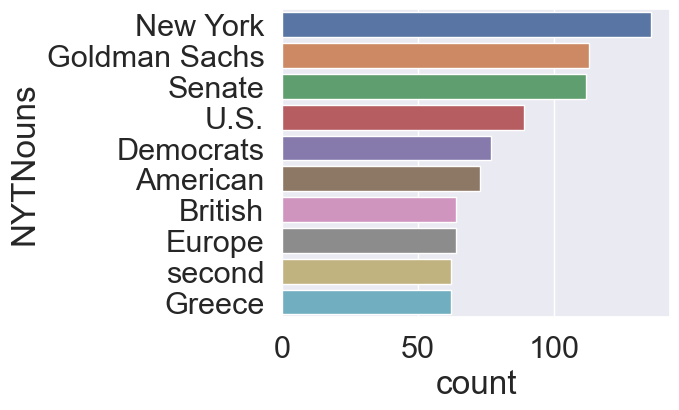

In [ ]:
nyt_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        nyt_topics.append(ent.text.strip())
df_nyttopics = pd.DataFrame(nyt_topics, columns=["NYTNouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="NYTNouns",
             data=df_nyttopics,
             order=df_nyttopics["NYTNouns"].value_counts().iloc[1:11].index)
plt.show()

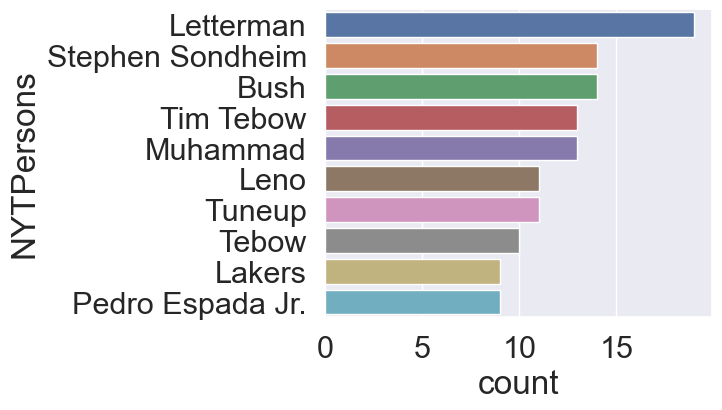

In [ ]:
nyt_topics = []
for ent in doc.ents:
    if ent.label_ == "PERSON":
        nyt_topics.append(ent.text.strip())

df_nyttopics = pd.DataFrame(nyt_topics, columns=["NYTPersons"])
plt.figure(figsize=(5,4))
sns.countplot(y="NYTPersons",
             data=df_nyttopics,
             order=df_nyttopics["NYTPersons"].value_counts().iloc[1:11].index)
plt.show()


In [ ]:
def get_named_persons(article):
    doc = nlp(article)
    named_entities = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            named_entities.append(ent.text)
    return named_entities

In [ ]:
df_2010_sm = df_2010.head(2000)

In [ ]:
#df_2010_sm["named_entities"] = df_2010_sm["excerpt"].apply(extract_named_entities)
nlp.max_length = 344975  # Set a higher limit for nlp.max_length

text = df_2010_sm['title'].str.cat(sep=' ')
get_named_persons(text)

['Louis Faurer',
 'Faurer',
 'Corrections Are',
 'Martha Rose Shulman',
 'Annibale Carracci',
 'Anibale',
 'Corrections',
 'Warren Buffett',
 'Buika',
 'Kendry Morales',
 'Joba Chamberlain',
 'Morales',
 'Haggler',
 'Charles E. Schumer',
 'Schumer Falls Quiet',
 'Lesley Alderman',
 'David Stern',
 'William Styron',
 'George W. Bush',
 'Wang Lequan',
 'Mark Twain',
 'Lindsey Sichel',
 'David Rubinstein',
 'Brett Gardner',
 'Robinson Cano',
 'Pettitte Shows He Needs Little',
 'Mike Tanier',
 'Mike Tanier',
 'James Sturm',
 'Kendry Morales',
 'Joe Girardi',
 'Glamour Selected',
 'Jane Marion Morril',
 'Benjamin Charles Case',
 'Jane Morril',
 'Benjamin Case Drivers',
 'Gore',
 'Ken Light',
 'Al Gore',
 'Fatih Akin',
 'Dan Williams',
 'Brian Conroy',
 'Christopher Harris Quick',
 'Vanessa Matsis',
 'Shaun McCready',
 'Jason Pierre-Paul',
 'Kyle Wilson',
 'Jeremy Jaech',
 'Marcella',
 'Mahmoud Ahmadinejad',
 'Kerri Strug',
 'Robert Fischer III',
 'Mahmoud Ahmadinejad',
 'Robert Mugabe',
 'M

In [ ]:
df_2010_sm_copy = df_2010_sm.copy()
df_2010_sm_copy.loc[:, "named_entities"] = df_2010_sm_copy["title"].apply(get_named_persons)


In [ ]:
df_2010_sm_copy.head()

,year,title,excerpt,named_entities
16097393,2010,An excerpt from the Metropolitan Opera's produ...,,[La Traviata']
16097394,2010,"Over the past couple of years, Hadoop has turn...",,[]
16097395,2010,An article on Friday about the work of the pho...,,"[Louis Faurer, Faurer]"
16097396,2010,Are those perfect chairs just making us stay s...,,[]
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman]


In [ ]:
df_2010_sm_copy.head()

,year,title,excerpt,named_entities
16097393,2010,An excerpt from the Metropolitan Opera's produ...,,[La Traviata']
16097394,2010,"Over the past couple of years, Hadoop has turn...",,[]
16097395,2010,An article on Friday about the work of the pho...,,"[Louis Faurer, Faurer]"
16097396,2010,Are those perfect chairs just making us stay s...,,[]
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman]


In [ ]:
df_2010_sm_copy_non_empty = df_2010_sm_copy[df_2010_sm_copy['named_entities'].apply(len) > 0]

In [ ]:
df_2010_sm_copy_non_empty.head()

,year,title,excerpt,named_entities
16097393,2010,An excerpt from the Metropolitan Opera's produ...,,[La Traviata']
16097395,2010,An article on Friday about the work of the pho...,,"[Louis Faurer, Faurer]"
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman]
16097398,2010,An art entry in the Listings pages last Friday...,,"[Annibale Carracci, Anibale]"
16097400,2010,Warren Buffett’s crucial $5 billion investment...,,[Warren Buffett]


In [ ]:
df_2010_sm_copy_non_empty['first_name'] = df_2010_sm_copy_non_empty['named_entities'].apply(lambda x: ' '.join(x).split()[0])

/var/folders/_z/wg0q98r5153183hvq_8k4vj80000gn/T/ipykernel_9122/183911364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_sm_copy_non_empty['first_name'] = df_2010_sm_copy_non_empty['named_entities'].apply(lambda x: ' '.join(x).split()[0])


In [ ]:
df_2010_sm_copy_non_empty.head()

,year,title,excerpt,named_entities,first_name
16097393,2010,An excerpt from the Metropolitan Opera's produ...,,[La Traviata'],La
16097395,2010,An article on Friday about the work of the pho...,,"[Louis Faurer, Faurer]",Louis
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman],Martha
16097398,2010,An art entry in the Listings pages last Friday...,,"[Annibale Carracci, Anibale]",Annibale
16097400,2010,Warren Buffett’s crucial $5 billion investment...,,[Warren Buffett],Warren


In [ ]:
pip install gender-guesser


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: /Users/oem123/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gender_guesser.detector as gender

In [ ]:
detector = gender.Detector()
df_2010_sm_copy_non_empty = df_2010_sm_copy_non_empty.copy()

df_2010_sm_copy_non_empty['gender'] = ''

for index, row in df_2010_sm_copy_non_empty.iterrows():
    names = row['first_name']
    if isinstance(names, list):
        name_str = " ".join(names)
    else:
        name_str = names
    gender = detector.get_gender(name_str)
    df_2010_sm_copy_non_empty.loc[index, 'gender'] = gender

In [ ]:
df_2010_sm_copy_non_empty.head()

,year,title,excerpt,named_entities,first_name,gender
16097393,2010,An excerpt from the Metropolitan Opera's produ...,,[La Traviata'],La,unknown
16097395,2010,An article on Friday about the work of the pho...,,"[Louis Faurer, Faurer]",Louis,male
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman],Martha,female
16097398,2010,An art entry in the Listings pages last Friday...,,"[Annibale Carracci, Anibale]",Annibale,male
16097400,2010,Warren Buffett’s crucial $5 billion investment...,,[Warren Buffett],Warren,male


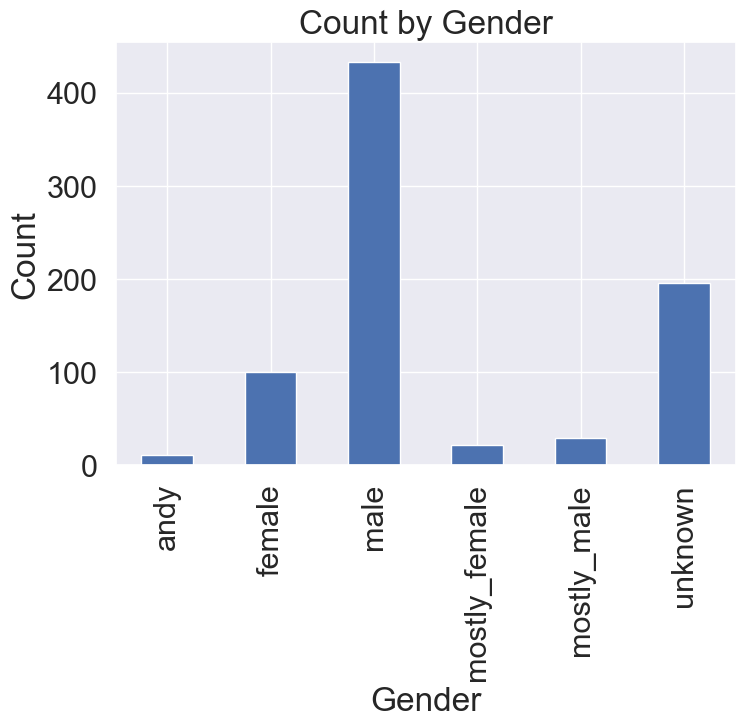

In [ ]:
# create a groupby object by 'gender'
gender_grouped = df_2010_sm_copy_non_empty.groupby('gender')

# get the count of each gender group
gender_counts = gender_grouped.size()

# create the bar plot
gender_counts.plot(kind='bar')

# set the labels for x and y axes and the title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')

# show the plot
plt.show()

In [ ]:
#getting all articles that mention female:
df_2010_sm_female = df_2010_sm_copy_non_empty[df_2010_sm_copy_non_empty['gender'] == 'female']

In [ ]:
male_count = df_2010_sm_copy_non_empty['gender'].value_counts()['male']
mostly_male_count = df_2010_sm_copy_non_empty['gender'].value_counts()['mostly_male']
female_count = df_2010_sm_copy_non_empty['gender'].value_counts()['female']
mostly_female_count = df_2010_sm_copy_non_empty['gender'].value_counts()['mostly_female']

In [ ]:
male_percent = ((male_count + mostly_male_count) / df_2010_sm_copy_non_empty.shape[0])*100

In [ ]:
male_percent

58.4070796460177

In [ ]:
female_percent = ((female_count + mostly_female_count) / df_2010_sm_copy_non_empty.shape[0])*100
female_percent

15.423514538558786

In [ ]:
df_2010_sm_female

,year,title,excerpt,named_entities,first_name,gender
16097397,2010,Recipes for Health columnist Martha Rose Shulm...,,[Martha Rose Shulman],Martha,female
16097454,2010,Jane Marion Morril and Benjamin Charles Case w...,,"[Jane Marion Morril, Benjamin Charles Case, Ja...",Jane,female
16097468,2010,What started in freshman year of college took ...,,"[Vanessa Matsis, Shaun McCready]",Vanessa,female
16097480,2010,"“Bodies, bodies. The beach was crowded, Marcel...",,[Marcella],Marcella,female
16097482,2010,A former gold-medal-winning Olympic gymnast te...,,"[Kerri Strug, Robert Fischer III]",Kerri,female
...,...,...,...,...,...,...
16099292,2010,"Janet L. Yellen, president of the Federal Rese...",,[Janet L. Yellen],Janet,female
16099326,2010,The president will nominate Janet L. Yellen to...,,[Janet L. Yellen],Janet,female
16099330,2010,Caron Butler’s 35-point performance helped Dal...,,[Caron Butler’s],Caron,female
16099331,2010,The wine panel tasted 20 bottles of malbec fro...,,[Argentina Opens the Tap for Malbec],Argentina,female


In [ ]:
text = df_2010_sm_female['title'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]
doc = nlp(text)
female_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        female_topics.append(token)
        
female_topics = [str(x) for x in female_topics]

In [ ]:
female_topics

['Recipes',
 'columnist',
 'ways',
 'tacos',
 'evening',
 'event',
 'space',
 'freshman',
 'year',
 'college',
 'years',
 'Bodies',
 'bodies',
 'beach',
 'people',
 'gold',
 'medal',
 'gymnast',
 'teams',
 'lawyer',
 'flutist',
 'music',
 'specialist',
 'colleagues',
 'Flute',
 'Tricks',
 'thing',
 'architecture',
 'legacy',
 'company',
 'brother',
 'basketball',
 'sister',
 'barbecue',
 'hike',
 'respite',
 'documentary',
 'choreographer',
 'Woman',
 'hiatus',
 'band',
 'Chicks',
 'advertising',
 'review',
 'department',
 'submissions',
 'year',
 'campaign',
 'finance',
 'legislation',
 'disclosure',
 'campaign',
 'cash',
 'byline',
 'article',
 'singer',
 'entrance',
 'Wo)Men',
 'breakfast',
 'gym',
 'husband',
 'Housewife',
 'Break',
 'bride',
 'radiologist',
 'bridegroom',
 'gastroenterologist',
 'troupes',
 'companies',
 'season',
 'master',
 'degrees',
 'filmmaker',
 'movie',
 'film',
 'career',
 'spotlight',
 'wife',
 'Years',
 'actress',
 'series',
 'Web',
 'life',
 'television

In [ ]:
pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: /Users/oem123/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


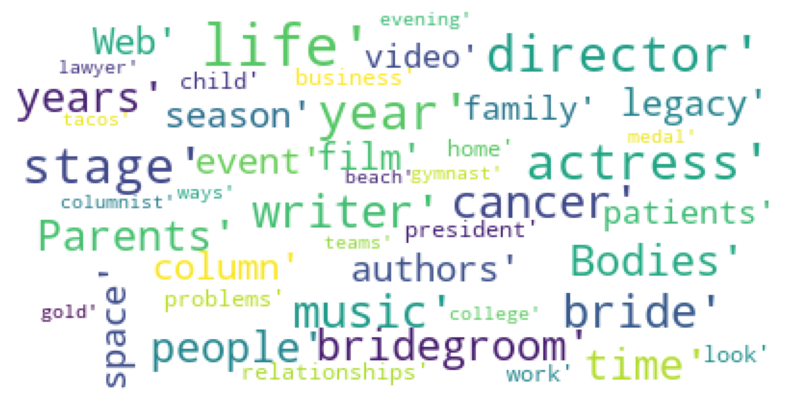

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(female_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()